Paketlerin import edilmesi:

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

Veri setinin yüklenmesi:

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Veri seti hakkında genel bilgiler:

In [3]:
def check_df(dataframe):
    print("################# shape ##################")
    print(dataframe.shape)
    print("################# types ##################")
    print(dataframe.dtypes)
    print("################# head ##################")
    print(dataframe.head())
    print("################# tail ##################")
    print(dataframe.tail())
    print("################# NA ##################")
    print(dataframe.isnull().sum())
    print("################# Quantiles ##################")
    print(dataframe.describe([0,0.05,0.50,0.95,0.99,1]).T)

check_df(df)

df.describe()

################# shape ##################
(1000, 8)
################# types ##################
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
################# head ##################
   gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score
0  female        group B           bachelor's degree      standard                    none          72             72             74
1  female        group C                some college      standard               completed          69             90             88
2  female        group B             master's degree      standard                    none          90             95             93
3    male   

,math score,reading score,writing score
count,1000.000,1000.000,1000.000
mean,66.089,69.169,68.054
std,15.163,14.600,15.196
min,0.000,17.000,10.000
25%,57.000,59.000,57.750
50%,66.000,70.000,69.000
75%,77.000,79.000,79.000
max,100.000,100.000,100.000


Kategorik, sayısal ve kardinal değişkenlerin gözlemi:

In [4]:
df.info()

def grab_col_names(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]


    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

##################### Categoric #####################
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

##################### Numeric #####################
['math score', 'reading score', 'writing score']

####################

Kategorik ve sayısal değişkenlerin görselleştirilmesi:

        gender  Ratio
gender               
female     518 51.800
male       482 48.200
##########################################


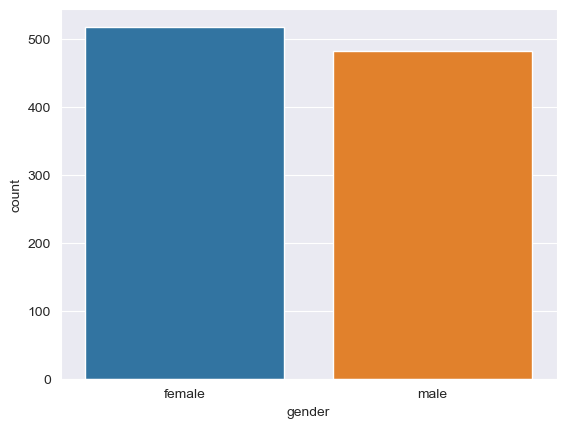

                race/ethnicity  Ratio
race/ethnicity                       
group C                    319 31.900
group D                    262 26.200
group B                    190 19.000
group E                    140 14.000
group A                     89  8.900
##########################################


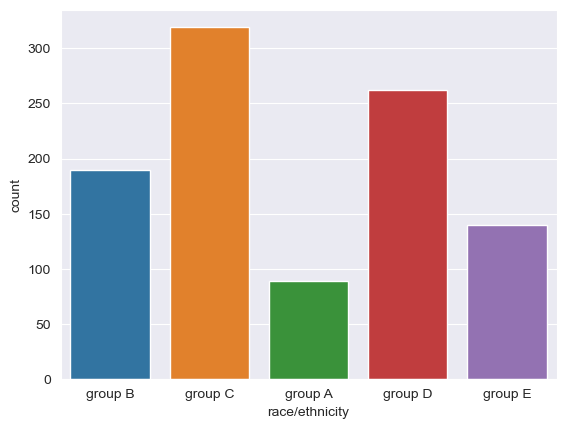

                             parental level of education  Ratio
parental level of education                                    
some college                                         226 22.600
associate's degree                                   222 22.200
high school                                          196 19.600
some high school                                     179 17.900
bachelor's degree                                    118 11.800
master's degree                                       59  5.900
##########################################


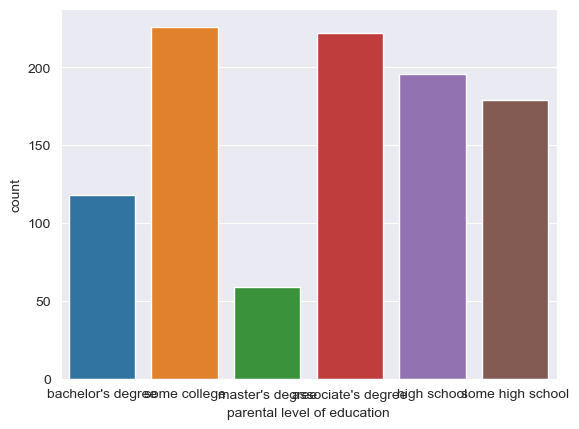

              lunch  Ratio
lunch                     
standard        645 64.500
free/reduced    355 35.500
##########################################


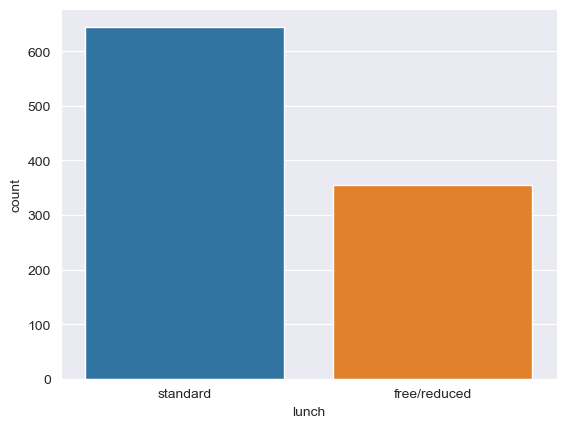

                         test preparation course  Ratio
test preparation course                                
none                                         642 64.200
completed                                    358 35.800
##########################################


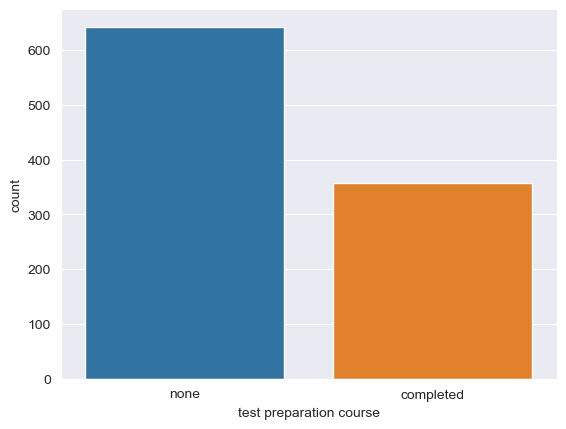

In [5]:
def cat_summary(dataframe, col_name, plot = True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio":100 * dataframe[col_name].value_counts() / len(df)})),
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col)

Histogram:

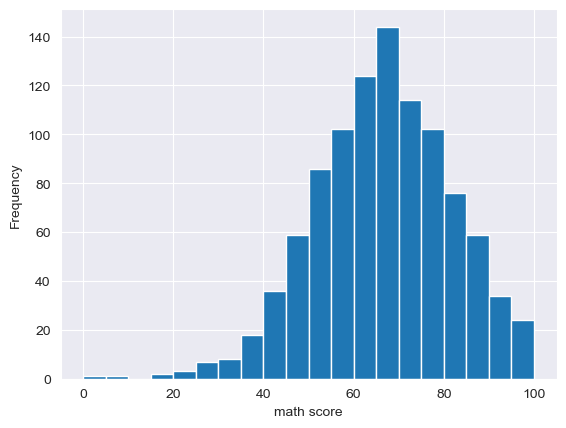

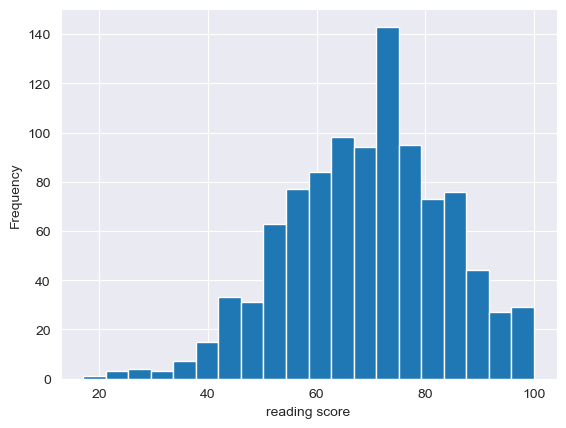

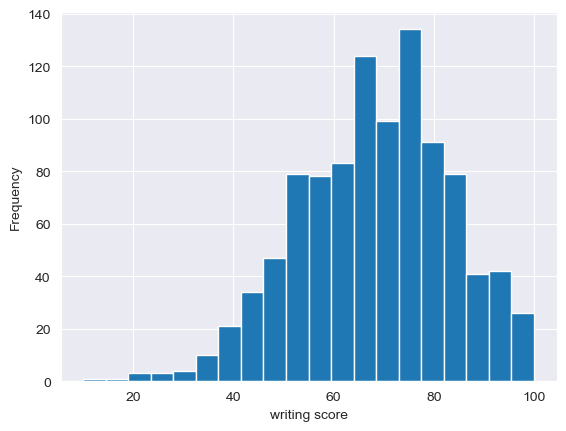

In [6]:
def hist_num_columns_show(dataframe, num_column):
    dataframe[num_column].hist(bins=20)
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.show(block=True)


for num_col in num_cols:
    hist_num_columns_show(df, num_col)

Veri görselleştirme:

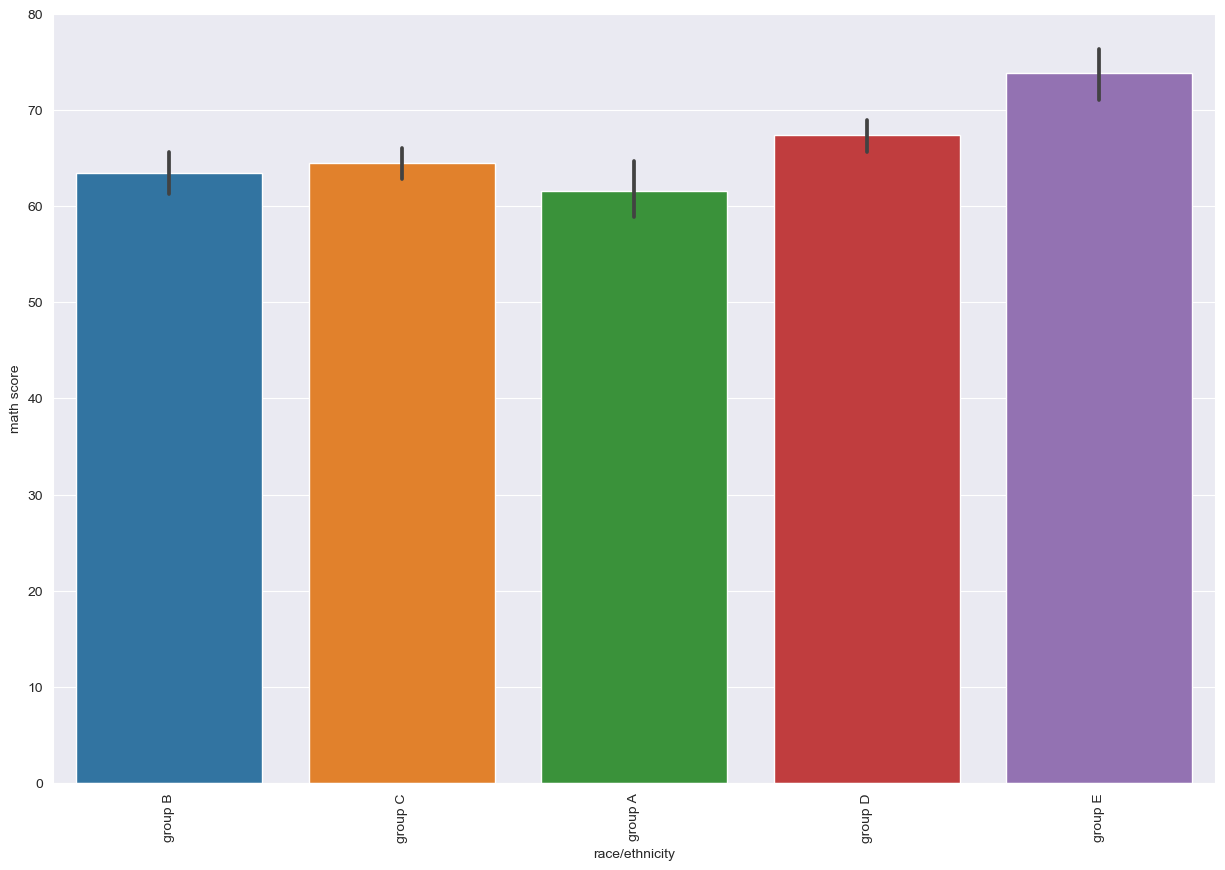

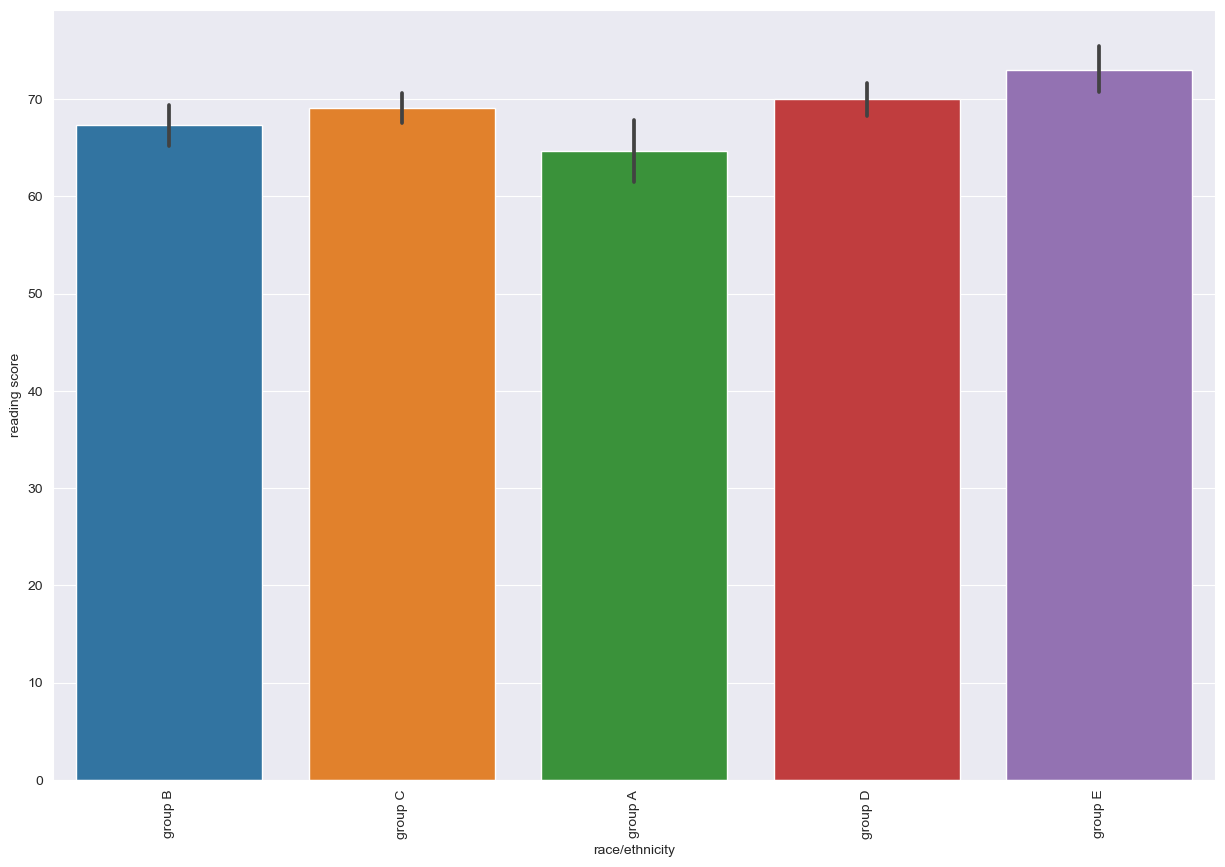

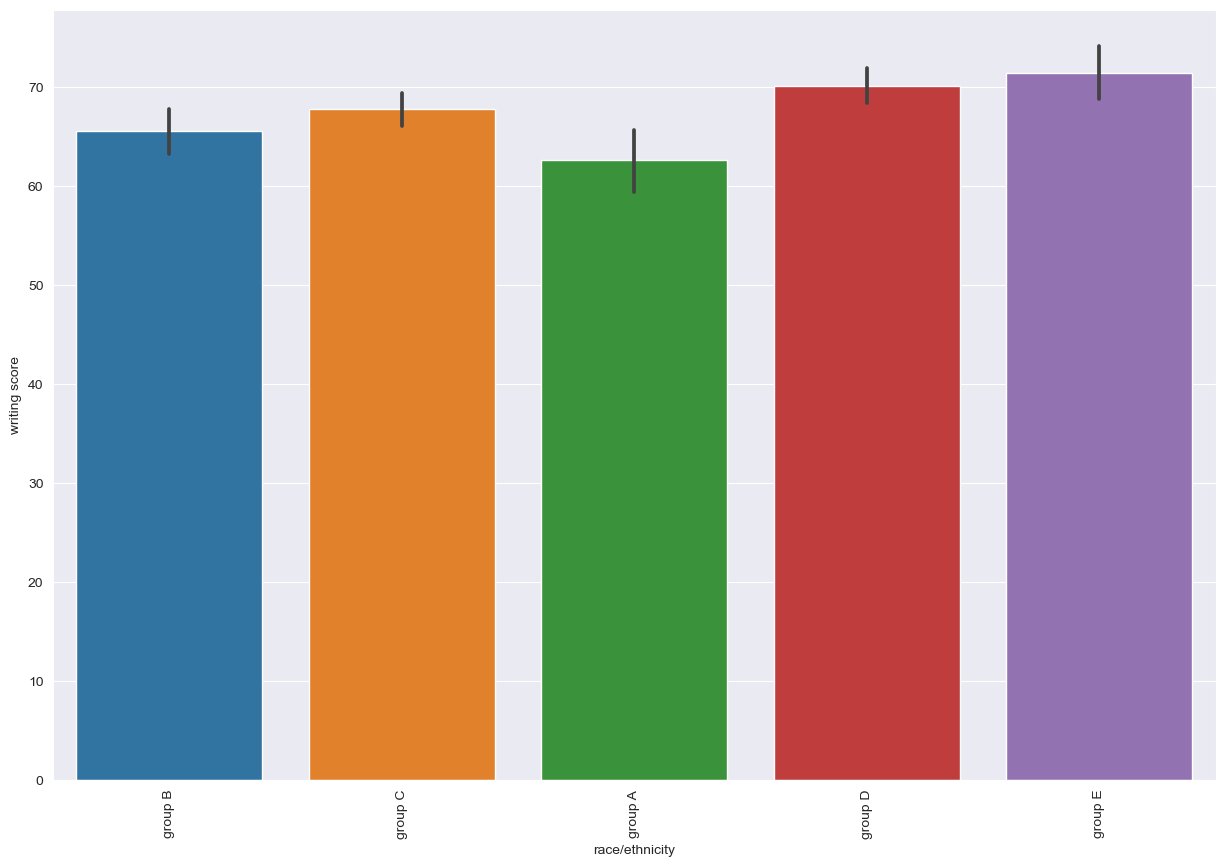

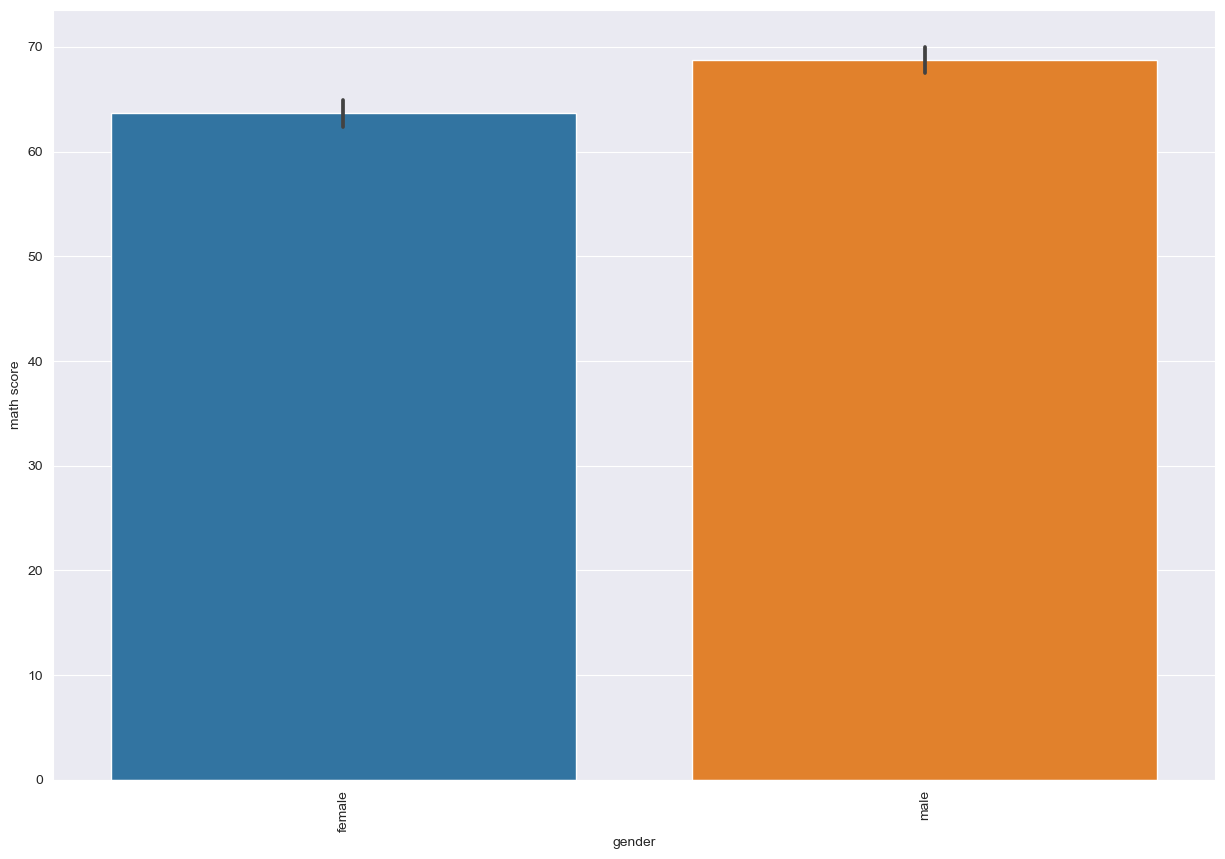

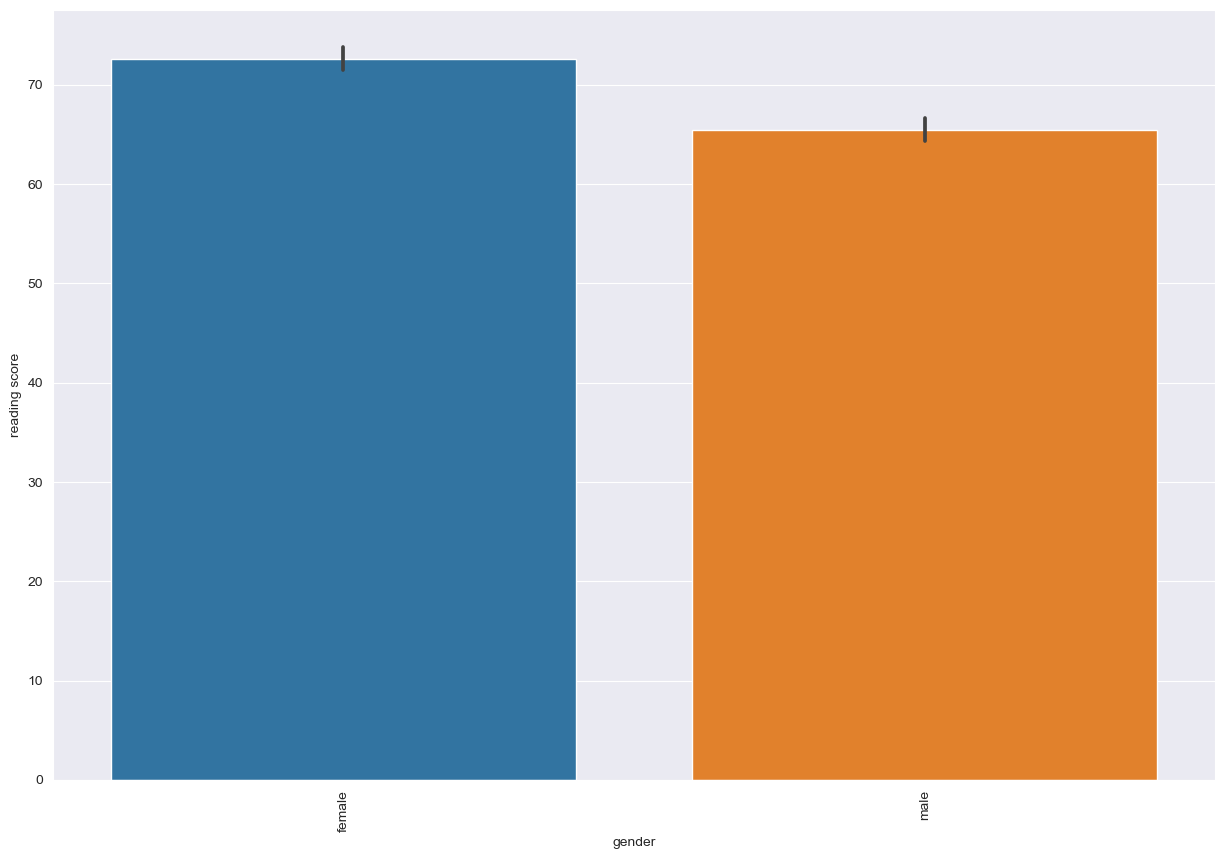

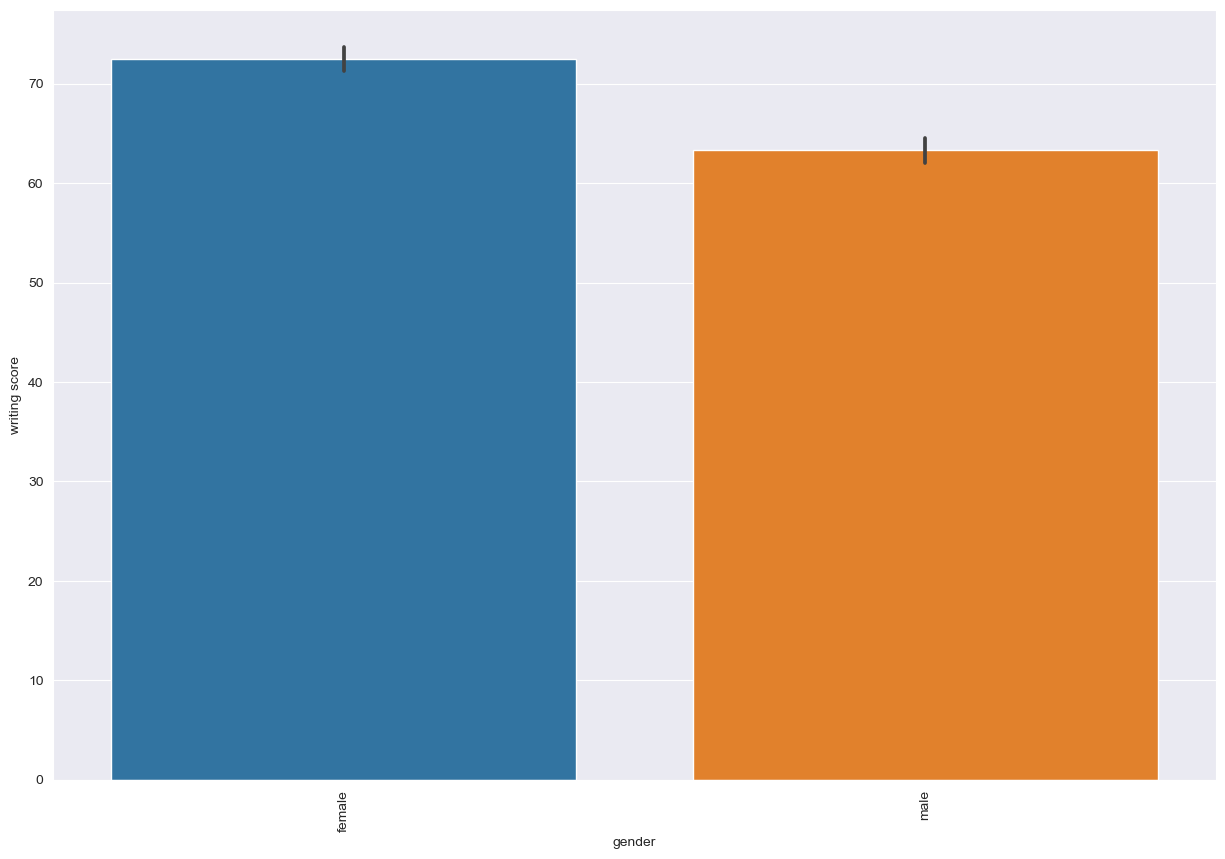

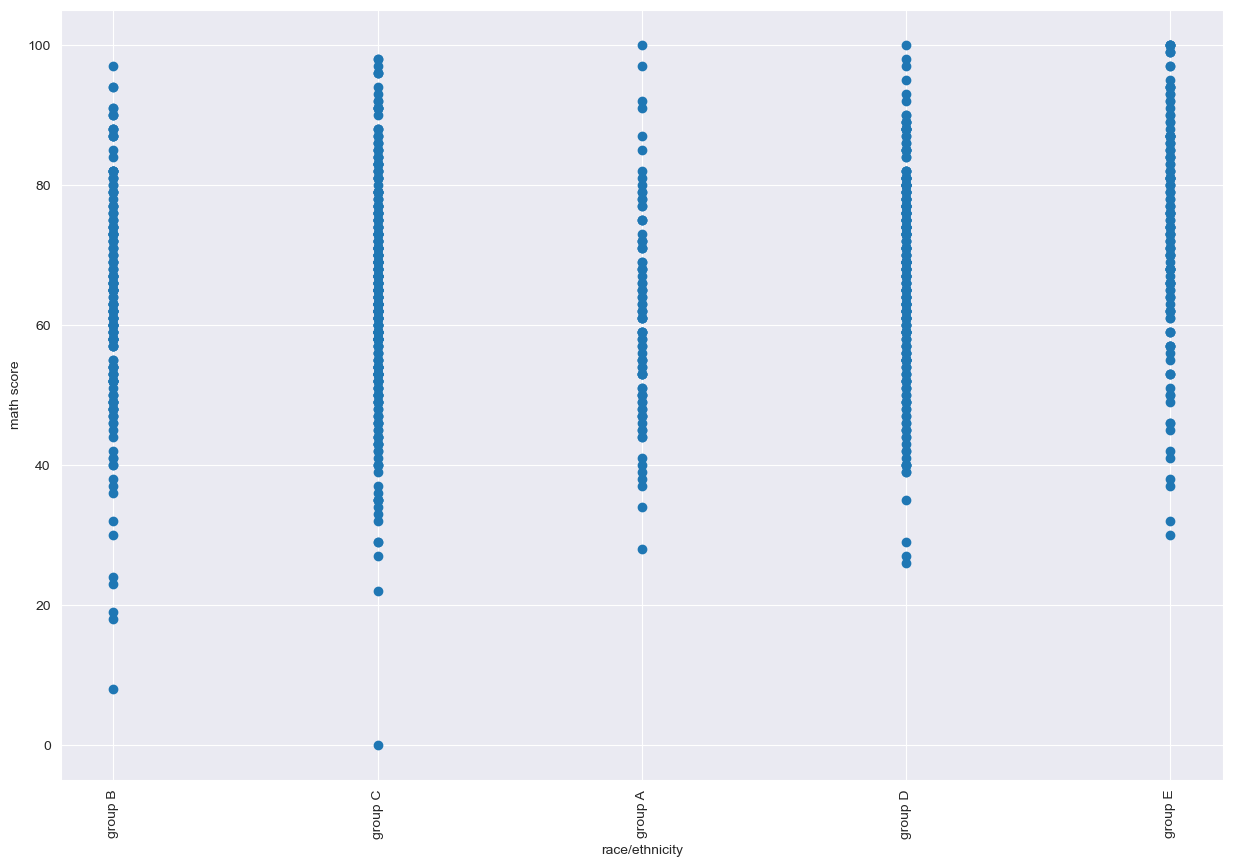

In [7]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="math score", y="race/ethnicity", data=df)
plt.xticks(rotation= 90);
plt.show()

plt.figure(figsize=(15,10))
ax = sns.barplot(x="race/ethnicity", y="reading score", data=df)
plt.xticks(rotation= 90);
plt.show()

plt.figure(figsize=(15,10))
ax = sns.barplot(x="race/ethnicity", y="writing score", data=df)
plt.xticks(rotation= 90);
plt.show()

plt.figure(figsize=(15,10))
ax = sns.barplot(x="gender", y="math score", data=df)
plt.xticks(rotation= 90);
plt.show()

plt.figure(figsize=(15,10))
ax = sns.barplot(x="gender", y="reading score", data=df)
plt.xticks(rotation= 90);
plt.show()

plt.figure(figsize=(15,10))
ax = sns.barplot(x="gender", y="writing score", data=df)
plt.xticks(rotation= 90);
plt.show()

plt.figure(figsize=(15,10))
plt.scatter('race/ethnicity',"math score" , data=df)
plt.xticks(rotation=90)
plt.xlabel('race/ethnicity')
plt.ylabel('math score')
plt.show()


Korelasyon Matrisi:
+1: Pozitif korelasyon. Bu, bir değişkenin değeri artarken diğer değişkenin de değerinin arttığı anlamına gelir.
0: Korelasyon yok veya çok zayıf korelasyon. Bu, değişkenler arasında herhangi bir ilişki olmadığı veya çok zayıf bir ilişki olduğu anlamına gelir.
-1: Negatif korelasyon. Bu, bir değişkenin değeri artarken diğer değişkenin değerinin azaldığı anlamına gelir.

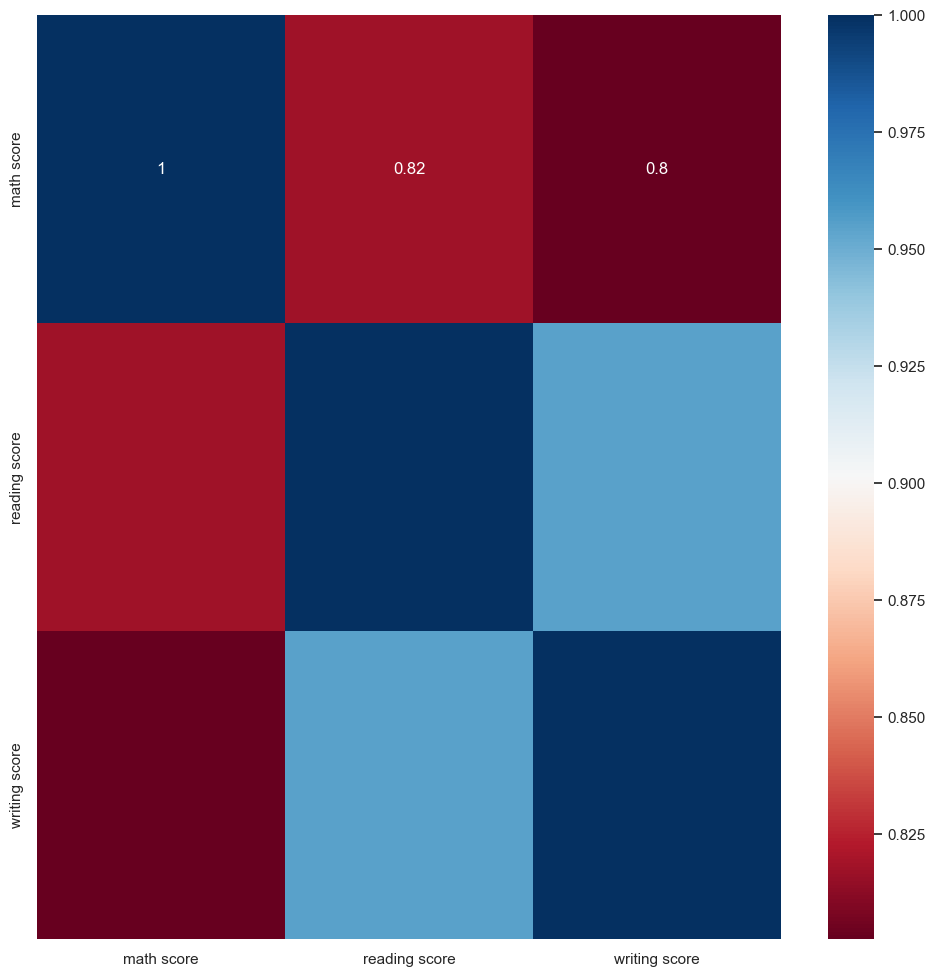

In [8]:
corr = df[num_cols].corr()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

Özellik mühendisliği:

In [9]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df,"math score")
outlier_thresholds(df,"writing score")
outlier_thresholds(df,"reading score")

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

check_outlier(df,"math score")
check_outlier(df,"writing score")
check_outlier(df,"reading score")


True

Aykırı değerlerin kendilerine erişmek:

In [10]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])
    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) |(dataframe[col_name] > up ))].index
        return outlier_index

grab_outliers(df, "math score")

     gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score
17   female        group B            some high school  free/reduced                    none          18             32             28
59   female        group C            some high school  free/reduced                    none           0             17             10
145  female        group C                some college  free/reduced                    none          22             39             33
338  female        group B            some high school  free/reduced                    none          24             38             27
466  female        group D          associate's degree  free/reduced                    none          26             31             38
787  female        group B                some college      standard                    none          19             38             32
842  female        group B                 high school 

Eksik değerler:

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Eksik gözlem olmadığı için bir şey yapmamıza gerek yok.